<a href="https://colab.research.google.com/github/kamehl/ex21/blob/main/wanictf_2021_fall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Crypto

##fox

In [4]:
!cat /content/drive/MyDrive/wanictf_2021_fall/crypto/fox/cry-fox/chall.py

flag = b"FAKE{REDACTED}"


def bytes_to_int(B: bytes):
    X = 0
    for b in B:
        X <<= 8
        X += b
    return X


print(bytes_to_int(flag))


flag: $bytes$ を数値に変換している

In [1]:
!cat /content/drive/MyDrive/wanictf_2021_fall/crypto/fox/cry-fox/output.txt

19116989514623535769166210117786818367158332986915210065591753844573169066323884981321863605962664727709419615399694310104576887228581060509732286555123028133634836954522269304382229987197


逆変換はcryptodomeモジュール$^※$のlong_to_bytesが簡単

In [1]:
!pip install pycryptodome

     |████████████████████████████████| 1.9 MB 5.0 MB/s 


※これまでpycryptoモジュールもよく使ってたけど、webによると長期間メンテされてないらしい

In [2]:
from Crypto.Util.number import *

In [3]:
long_to_bytes(19116989514623535769166210117786818367158332986915210065591753844573169066323884981321863605962664727709419615399694310104576887228581060509732286555123028133634836954522269304382229987197)

b'FLAG{R1ng_d1n9_ding_d1ng_ding3ring3ding?__Wa_p@_pa_p@_pa_p@_pow?__or_konko-n?}'

公式WriteUpの解法

In [47]:
x = 19116989514623535769166210117786818367158332986915210065591753844573169066323884981321863605962664727709419615399694310104576887228581060509732286555123028133634836954522269304382229987197

B = []
while True:
  B = [0xff & x] + B
  x >>= 8
  if x == 0: break

print(bytes(B))


b'FLAG{R1ng_d1n9_ding_d1ng_ding3ring3ding?__Wa_p@_pa_p@_pa_p@_pow?__or_konko-n?}'


他にもいろんなやり方がある、例えばこんな感じ

でも、桁数によってうまくいかないことがある・・・

In [56]:
x = 19116989514623535769166210117786818367158332986915210065591753844573169066323884981321863605962664727709419615399694310104576887228581060509732286555123028133634836954522269304382229987197

bytes.fromhex("{:x}".format(x))


b'FLAG{R1ng_d1n9_ding_d1ng_ding3ring3ding?__Wa_p@_pa_p@_pa_p@_pow?__or_konko-n?}'

これなら桁数を気にしない

In [55]:
x = 19116989514623535769166210117786818367158332986915210065591753844573169066323884981321863605962664727709419615399694310104576887228581060509732286555123028133634836954522269304382229987197

x.to_bytes((x.bit_length()+7)//8 ,'big')

b'FLAG{R1ng_d1n9_ding_d1ng_ding3ring3ding?__Wa_p@_pa_p@_pa_p@_pow?__or_konko-n?}'

こんなのも発見

In [8]:
x = 19116989514623535769166210117786818367158332986915210065591753844573169066323884981321863605962664727709419615399694310104576887228581060509732286555123028133634836954522269304382229987197

d=0x100
b=[]

while x > 0:
  b.append(chr(x%d))
  x //= d

"".join(reversed(b))


'FLAG{R1ng_d1n9_ding_d1ng_ding3ring3ding?__Wa_p@_pa_p@_pa_p@_pow?__or_konko-n?}'

##dango

In [5]:
!cat /content/drive/MyDrive/wanictf_2021_fall/crypto/dango/cry-dango/chall.py

import secrets
from functools import reduce

flag = b"FAKE{REDACTED}"
key = [secrets.token_bytes(len(flag)) for _ in range(3)]


def XOR(*X):
    xor = lambda A, B: bytes(x ^ y for x, y in zip(A, B))
    return reduce(xor, X)


ciphertext = XOR(flag, key[0])
A = XOR(key[0], key[1], key[2])
B = XOR(key[0], key[1])
C = XOR(key[1], key[2])

print(f"ciphertext : {ciphertext.hex()}")
print(f"A : {A.hex()}")
print(f"B : {B.hex()}")
print(f"C : {C.hex()}")


つまり・・・

>ciphertext = flag ^ key0<br>
>A=key0 ^ key1 ^ key2<br>
>B=key0 ^ key1<br>
>C=key1 ^ key2<br>

なので

>ciphertext ^ A ^ C = flag ^ key0 ^ key0 ^ key1 ^ key2 ^ key1 ^ key2 = flag

In [5]:
!cat /content/drive/MyDrive/wanictf_2021_fall/crypto/dango/cry-dango/output.txt

ciphertext : bd35b1c95ee9436db8fad5c3aa493660e606fa4dd7fe171aac75313c18ce5fcf86f0
A : cae61858ee8c7198632c652fd8416092eb165e2f847f0ebd80637ed0ffd96c6e0359
B : e6ed8bda14f67343d81830f0f2be3299a97b541db48cfa1873a13e8d774f1e243ce7
C : 319fe8d6cb01539bbcb9ef9f13663d8b6274c50b0ce578c94b7910b3ca785ccea8d4


In [6]:
ciphertext = 0xbd35b1c95ee9436db8fad5c3aa493660e606fa4dd7fe171aac75313c18ce5fcf86f0
A = 0xcae61858ee8c7198632c652fd8416092eb165e2f847f0ebd80637ed0ffd96c6e0359
B = 0xe6ed8bda14f67343d81830f0f2be3299a97b541db48cfa1873a13e8d774f1e243ce7
C = 0x319fe8d6cb01539bbcb9ef9f13663d8b6274c50b0ce578c94b7910b3ca785ccea8d4

XOR関数はそのまま流用する

In [8]:
import secrets
from functools import reduce

def XOR(*X):
    xor = lambda A, B: bytes(x ^ y for x, y in zip(A, B))
    return reduce(xor, X)

In [9]:
XOR(long_to_bytes(ciphertext), long_to_bytes(A), long_to_bytes(C))

b'FLAG{dango_sankyodai_dango__-ooo-}'

##Sweet curve

In [10]:
j!cat /content/drive/MyDrive/wanictf_2021_fall/crypto/Sweet_curve/cry-sweet-curve/parameters.txt

# Given:
# - An elliptic curve: y**2 = x**3 - x + 1 (mod p)
# - Two points: P(x_P, y_P) and Q(x_Q, y_Q)

# Find the point P+Q
# The flag is the x value of P+Q
# Don't forget to convert it into a string!
p = 0x89a4e2c7f834f5fbc6f2a314e373e3723de7df6283c5d97cbca509c61e02965b7ef96efce1d827bfdfa7f21d22803558bb549f9ea15dfe9f47d3976648c55feb
x_P = 0x1e1cba0e07c61cf88e9f23b9859093c33c26cf83bcfb6fe24d7559cd0ea86fb2f144ae643ac5edf6f04ef065dc7c2c18d88ae02843592d5e611029fefc0fece
y_P = 0x198420b30a4330f82380326895d0ac06a1859bc49d45cd4b08021b857d23d515163b9151fbaf7ae5f816d485d129d3b1c4630d1fb45c6790af551428a5c85667
x_Q = 0x7e32edfd7befd8df93d7b738d6a1c95e1cfd56b3a6ccc4a62e4e0ae9059b4903e71fccbe07d8d45c762b4a3ed5c9d1a2505043d033e58adb72191259b81bc47d
y_Q = 0x46016c676585feaf048fff9d5cbb45dbd598c6c4c81694e0881bf110b57012f0bac6eaf7376fee015c8cecba1fc92206ca346f7d72ee1d60f820091c85fa76b3


楕円曲線暗号のような問題

剰余群上の楕円曲線を扱うが、今回は楕円曲線上の２点の加法について理解できてればOK

>$P + Q = R$<br>
>ただし、$P,Q,R$はいずれも楕円曲線上の点

とすると・・・

難しいことはさておき、$x_{r}$は次の式から求まる。


>$x_{r}=\phi^{2}-x_{p}-x_{q}$<br>
>$\phi＝\frac{y_{p}-y_{q}}{x_{p}-x_{q}}$

（参考）https://techracho.bpsinc.jp/yoshi/2019_08_16/79280

この時ポイントは「**割り算**」

「$x$で割る」とは「$x$の逆元をかける」ことなので・・・

そして剰余群の逆元はcryptodomeモジュールのinverse関数を使うのが常套


In [11]:
from Crypto.Util.number import *

p = 0x89a4e2c7f834f5fbc6f2a314e373e3723de7df6283c5d97cbca509c61e02965b7ef96efce1d827bfdfa7f21d22803558bb549f9ea15dfe9f47d3976648c55feb
x_P = 0x1e1cba0e07c61cf88e9f23b9859093c33c26cf83bcfb6fe24d7559cd0ea86fb2f144ae643ac5edf6f04ef065dc7c2c18d88ae02843592d5e611029fefc0fece
y_P = 0x198420b30a4330f82380326895d0ac06a1859bc49d45cd4b08021b857d23d515163b9151fbaf7ae5f816d485d129d3b1c4630d1fb45c6790af551428a5c85667
x_Q = 0x7e32edfd7befd8df93d7b738d6a1c95e1cfd56b3a6ccc4a62e4e0ae9059b4903e71fccbe07d8d45c762b4a3ed5c9d1a2505043d033e58adb72191259b81bc47d
y_Q = 0x46016c676585feaf048fff9d5cbb45dbd598c6c4c81694e0881bf110b57012f0bac6eaf7376fee015c8cecba1fc92206ca346f7d72ee1d60f820091c85fa76b3

x = x_P - x_Q
y = y_P - y_Q

x_inv = inverse(x, p)

x_R = pow(y * x_inv, 2, p) - x_P -x_Q

long_to_bytes(x_R)


b'FLAG{7h1s_curv3_alw@ys_r3m1nd5_me_0f_pucca}'

公式WriteUpをみるとinverse()の代わりに

> pow(x, -1, p)

が使われている

調べてみると、3.8以降のバージョンでサポートされたらしい



In [57]:
!python -V

Python 3.7.12


残念ながらデフォルトでは使えない

ところがどっこい、次のようにすればOKだったりする

うまくいく理由を考えると少し賢くなれるかも・・・

In [11]:
p = 0x89a4e2c7f834f5fbc6f2a314e373e3723de7df6283c5d97cbca509c61e02965b7ef96efce1d827bfdfa7f21d22803558bb549f9ea15dfe9f47d3976648c55feb
x_P = 0x1e1cba0e07c61cf88e9f23b9859093c33c26cf83bcfb6fe24d7559cd0ea86fb2f144ae643ac5edf6f04ef065dc7c2c18d88ae02843592d5e611029fefc0fece
y_P = 0x198420b30a4330f82380326895d0ac06a1859bc49d45cd4b08021b857d23d515163b9151fbaf7ae5f816d485d129d3b1c4630d1fb45c6790af551428a5c85667
x_Q = 0x7e32edfd7befd8df93d7b738d6a1c95e1cfd56b3a6ccc4a62e4e0ae9059b4903e71fccbe07d8d45c762b4a3ed5c9d1a2505043d033e58adb72191259b81bc47d
y_Q = 0x46016c676585feaf048fff9d5cbb45dbd598c6c4c81694e0881bf110b57012f0bac6eaf7376fee015c8cecba1fc92206ca346f7d72ee1d60f820091c85fa76b3

x = x_P - x_Q
y = y_P - y_Q

x_inv = pow(x, p-2, p)

x_R = pow(y * x_inv, 2, p) - x_P -x_Q

(x_R).to_bytes((x_R.bit_length()+7)//8, 'big')

b'FLAG{7h1s_curv3_alw@ys_r3m1nd5_me_0f_pucca}'

##AES-NOC

In [6]:
!cat /content/drive/MyDrive/wanictf_2021_fall/crypto/AES-NOC/cry-aesnoc/chall.py

import os

from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
from Crypto.Util.strxor import strxor

from secret import flag


class AESNOC:
    def __init__(self, key: bytes, iv: bytes):
        self.iv = iv
        self.key = key
        self.block_size = AES.block_size

    def encrypt(self, plaintext: bytes):
        cipher = AES.new(self.key, AES.MODE_ECB)
        plaintext = pad(plaintext, self.block_size)
        P = [
            plaintext[i : i + self.block_size]
            for i in range(0, len(plaintext), self.block_size)
        ]
        C = []

        P_prev = self.iv
        for p in P:
            c = cipher.encrypt(p)
            C.append(strxor(c, P_prev))
            P_prev = p

        return b"".join(C)


def main():
    key = os.urandom(16)
    iv = os.urandom(16)
    cipher = AESNOC(key, iv)

    assert len(flag) == 49
    assert flag.startswith(b"FLAG{")
    assert flag.endswith(b"}")

    iv = iv.hex()
    print(f"{iv = }")
    while True:
    

まず、平文長は49$byte$

>AES.block_size=16

と合わせて考えると、最後のブロックは平文が１byteしか入っていない（残りはpadding）

平文の最後1byteは

> }

で確定だから、最後のブロックの平文は全て既知


*   ｎｃで問い合わせると好きな平文を暗号文と同じ鍵で暗号化できること
*   平文をAES暗号化した後、1個前の平文とXORしていること

<pre>
        P_prev = self.iv
        for p in P:
            c = cipher.encrypt(p)
            C.append(strxor(c, P_prev))
            P_prev = p
</pre>

から、後ろから２番目の平文も分かる

あとはこれを繰り返せば後ろから順に平文がわかるハズ


<pre>
$ nc aesnoc.crypto.wanictf.org 50000
iv = '9ac6cf0aeb841404af41d07abda35709'
1. Get encrypted flag
2. Encrypt
> 1
encrypted_flag = '42de76f17637d3e87516e07556eccd555f89fcc13139fd40a1e804c782b1654eda7c797795638437b0698c20e6853f163968c68058d636c2cdb3a3ba4486fc1a'
1. Get encrypted flag
2. Encrypt
>
</pre>


In [27]:
iv = '9ac6cf0aeb841404af41d07abda35709'
encrypted_flag = '42de76f17637d3e87516e07556eccd555f89fcc13139fd40a1e804c782b1654eda7c797795638437b0698c20e6853f163968c68058d636c2cdb3a3ba4486fc1a'


In [15]:
b'}'.hex()

'7d'

<pre>
> 2
Plaintext [hex] > 7d
ciphertext = 'c6f165eb86267da40ec210aba67af42c'
1. Get encrypted flag
2. Encrypt
>
</pre>

In [ ]:
!pip install pycryptodome

In [19]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
from Crypto.Util.strxor import strxor

In [25]:
ciphertext = 'c6f165eb86267da40ec210aba67af42c'

In [28]:
strxor(bytes.fromhex(encrypted_flag[-32:]), strxor(bytes.fromhex(ciphertext), bytes.fromhex(iv)))

b'e_la5t_bl0ck___?'

In [23]:
b'e_la5t_bl0ck___?'.hex()

'655f6c6135745f626c30636b5f5f5f3f'

<pre>
> 2
Plaintext [hex] > 655f6c6135745f626c30636b5f5f5f3f
ciphertext = '64e5871b219ea0464043326a2c791c7776c870ca1aa134feccefc5743d6cb3c4'
1. Get encrypted flag
2. Encrypt
>
</pre>

In [29]:
ciphertext = '64e5871b219ea0464043326a2c791c7776c870ca1aa134feccefc5743d6cb3c4'

In [31]:
strxor(bytes.fromhex(encrypted_flag[64:-32]), strxor(bytes.fromhex(ciphertext[:32]), bytes.fromhex(iv)))

b'$_1f_y0u_kn0w_th'

In [32]:
b'$_1f_y0u_kn0w_th'.hex()

'245f31665f7930755f6b6e30775f7468'

<pre>
> 2
Plaintext [hex] > 245f31665f7930755f6b6e30775f7468
ciphertext = '8303728ca1ea817039f6bc894f62012937c82dcd70ac5be9ffb4c82f156c9893'
1. Get encrypted flag
2. Encrypt
>
</pre>

In [33]:
ciphertext = '8303728ca1ea817039f6bc894f62012937c82dcd70ac5be9ffb4c82f156c9893'

In [34]:
strxor(bytes.fromhex(encrypted_flag[32:64]), strxor(bytes.fromhex(ciphertext[:32]), bytes.fromhex(iv)))

b'FLAG{Wh47_h4pp3n'

#forensic

##partition01

Linux環境なのでsleuth kitでやってみる

In [ ]:
!apt install sleuthkit

In [38]:
!tar zxvf /content/drive/MyDrive/wanictf_2021_fall/forensic/partition01/partition.tar.gz -C /content/drive/MyDrive/wanictf_2021_fall/forensic/partition01/

partition.img


パーティションだろうけど・・・念のため

In [8]:
!file /content/drive/MyDrive/wanictf_2021_fall/forensic/partition01/partition.img

/content/drive/MyDrive/wanictf_2021_fall/forensic/partition01/partition.img: DOS/MBR boot sector; partition 1 : ID=0xee, start-CHS (0x0,0,2), end-CHS (0x3fe,57,58), startsector 1, 3932159 sectors, extended partition table (last)


ディスクイメージのパーティション構造を確認する

In [39]:
!mmls /content/drive/MyDrive/wanictf_2021_fall/forensic/partition01/partition.img

GUID Partition Table (EFI)
Offset Sector: 0
Units are in 512-byte sectors

      Slot      Start        End          Length       Description
000:  Meta      0000000000   0000000000   0000000001   Safety Table
001:  -------   0000000000   0000002047   0000002048   Unallocated
002:  Meta      0000000001   0000000001   0000000001   GPT Header
003:  Meta      0000000002   0000000033   0000000032   Partition Table
004:  000       0000002048   0000526335   0000524288   Linux filesystem
005:  001       0000526336   0001050623   0000524288   Linux filesystem
006:  002       0001050624   0001574911   0000524288   Linux filesystem
007:  003       0001574912   0002099199   0000524288   Linux filesystem
008:  004       0002099200   0002623487   0000524288   Linux filesystem
009:  005       0002623488   0003147775   0000524288   Linux filesystem
010:  006       0003147776   0003672063   0000524288   Linux filesystem
011:  007       0003672064   0003932126   0000260063   Linux filesystem
012:  ----

順番にパーティション内のファイルリストを確認する

In [40]:
!fls -o 0001050624 /content/drive/MyDrive/wanictf_2021_fall/forensic/partition01/partition.img

d/d 11:	lost+found
r/r 12:	flag.txt
d/d 65537:	$OrphanFiles


３つ目のパーティションにflag.txtという怪しいファイルがあったので確認する

In [41]:
!icat -o 0001050624 /content/drive/MyDrive/wanictf_2021_fall/forensic/partition01/partition.img 12

The "partition01" FLAG is the name of the 3rd partition!

FLAG{FLAG{FLAG{FLAG{FLAG{FLAG{FLAG{FLAG{FLAG{FLAG{FLAG{FLAG{FLAG{}}}}FLAG{FLAG{FLAG{FLAG{}FLAG{FLAG{FLAG{FLAG{}}}}}FLAG{FLAG{FLAG{FLAG{}}}}FLAG{FLAG{FLAG{FAKFLAG{FLAG{FLAG{FLAG{}}}}E{}}}}FLAG{FLAG{FLAG{FLAG{}}}}}}}FLAG{FLAG{FLAG{FLAG{}}}}}FLAG{FLAG{FLAG{FLAG{}}}FLAG{FLAG{FLAG{FLAG{}}FLAG{FLAG{FLAG{FLAG{}}}}}}FLAG{FLAG{FLAG{FLAG{}}}}FLAG{FLAG{FLAG{FLAG{}}}}FLAG{FLAG{FLAG{FLAG{}}}}FLAG{FLAG{FLAG{FLAG{}}}}FLAG{FLAG{FLAG{FLAG{}}}}FLAG{FLAG{FLAG{FLAG{}}}}FLAG{FLAG{FLAG{FLAG{}}}}FLAG{FLAG{FLAG{FLAG{}}}}FLAG{FLAG{FLAG{FLAG{}}}}FLAG{FLAG{FLAG{FLAG{}}}}FLAG{FLAG{FLAG{FLAG{}}}}FLAG{FLAG{FLAG{FLAG{}}}}FLAG{FLAG{FLAG{FLAG{}}}}}FLAG{FLAG{FLAG{FLAG{}}}}FLAG{FLAG{FLAG{FLAG{}}}}FLAG{FLAG{FLAG{FLAG{}}}}FLAG{FLAG{FLAG{FLAG{}}}}FLAG{FLAG{FLAG{FLAG{}}}}FLAG{FLAG{FLAG{FLAG{}}}}FLAG{FLAG{FLAG{FLAG{}}}}FLAG{FLAG{FLAG{FLAG{}}}}FLAG{FLAG{FLAG{FLAG{}}}}FLAG{FLAG{FLAG{FLAG{}}}}FLAG{FLAG{FLAG{FLAG{}}FLAG{FLAG{FLAG{FLAG{}}}}FLAG{FLAG{FLAG{FLAG{}}}}FLAG{FLAG

３つ目のパーティションの名前が”partition01”のFLAGだと書いてあるので、確認する

In [42]:
!fsstat -o 0001050624 /content/drive/MyDrive/wanictf_2021_fall/forensic/partition01/partition.img 

FILE SYSTEM INFORMATION
--------------------------------------------
File System Type: Ext4
Volume Name: FLAG{GPT03}
Volume ID: 409e326462f68eaf944ae5a676bcebb1

Last Written at: 2021-10-28 07:11:56 (UTC)
Last Checked at: 2021-10-28 07:11:18 (UTC)

Last Mounted at: 2021-10-28 07:11:43 (UTC)
Unmounted properly
Last mounted on: /media/ishioka/FLAG{GPT03}

Source OS: Linux
Dynamic Structure
Compat Features: Journal, Ext Attributes, Resize Inode, Dir Index
InCompat Features: Filetype, Extents, 64bit, Flexible Block Groups, 
Read Only Compat Features: Sparse Super, Large File, Huge File, Extra Inode Size

Journal ID: 00
Journal Inode: 8

METADATA INFORMATION
--------------------------------------------
Inode Range: 1 - 65537
Root Directory: 2
Free Inodes: 65524
Inode Size: 128

CONTENT INFORMATION
--------------------------------------------
Block Groups Per Flex Group: 16
Block Range: 0 - 65535
Block Size: 4096
Free Blocks: 59314

BLOCK GROUP INFORMATION
-----------------------------------

##partition02

パーティションの構造を再度確認する

In [3]:
!mmls /content/drive/MyDrive/wanictf_2021_fall/forensic/partition01/partition.img

GUID Partition Table (EFI)
Offset Sector: 0
Units are in 512-byte sectors

      Slot      Start        End          Length       Description
000:  Meta      0000000000   0000000000   0000000001   Safety Table
001:  -------   0000000000   0000002047   0000002048   Unallocated
002:  Meta      0000000001   0000000001   0000000001   GPT Header
003:  Meta      0000000002   0000000033   0000000032   Partition Table
004:  000       0000002048   0000526335   0000524288   Linux filesystem
005:  001       0000526336   0001050623   0000524288   Linux filesystem
006:  002       0001050624   0001574911   0000524288   Linux filesystem
007:  003       0001574912   0002099199   0000524288   Linux filesystem
008:  004       0002099200   0002623487   0000524288   Linux filesystem
009:  005       0002623488   0003147775   0000524288   Linux filesystem
010:  006       0003147776   0003672063   0000524288   Linux filesystem
011:  007       0003672064   0003932126   0000260063   Linux filesystem
012:  ----

順にファイルリストを見ていく

In [5]:
!fls /content/drive/MyDrive/wanictf_2021_fall/forensic/partition01/partition.img -o 0002099200

d/d 11:	lost+found
r/r 12:	flag01.txt
r/r 13:	flag01.png
d/d 65537:	$OrphanFiles


In [6]:
!fls /content/drive/MyDrive/wanictf_2021_fall/forensic/partition01/partition.img -o 0003147776

d/d 11:	lost+found
r/r 12:	flag02.txt
r/r 13:	flag02.png
d/d 65537:	$OrphanFiles


flag01.pngとflag02.pngを発見

結合して表示する

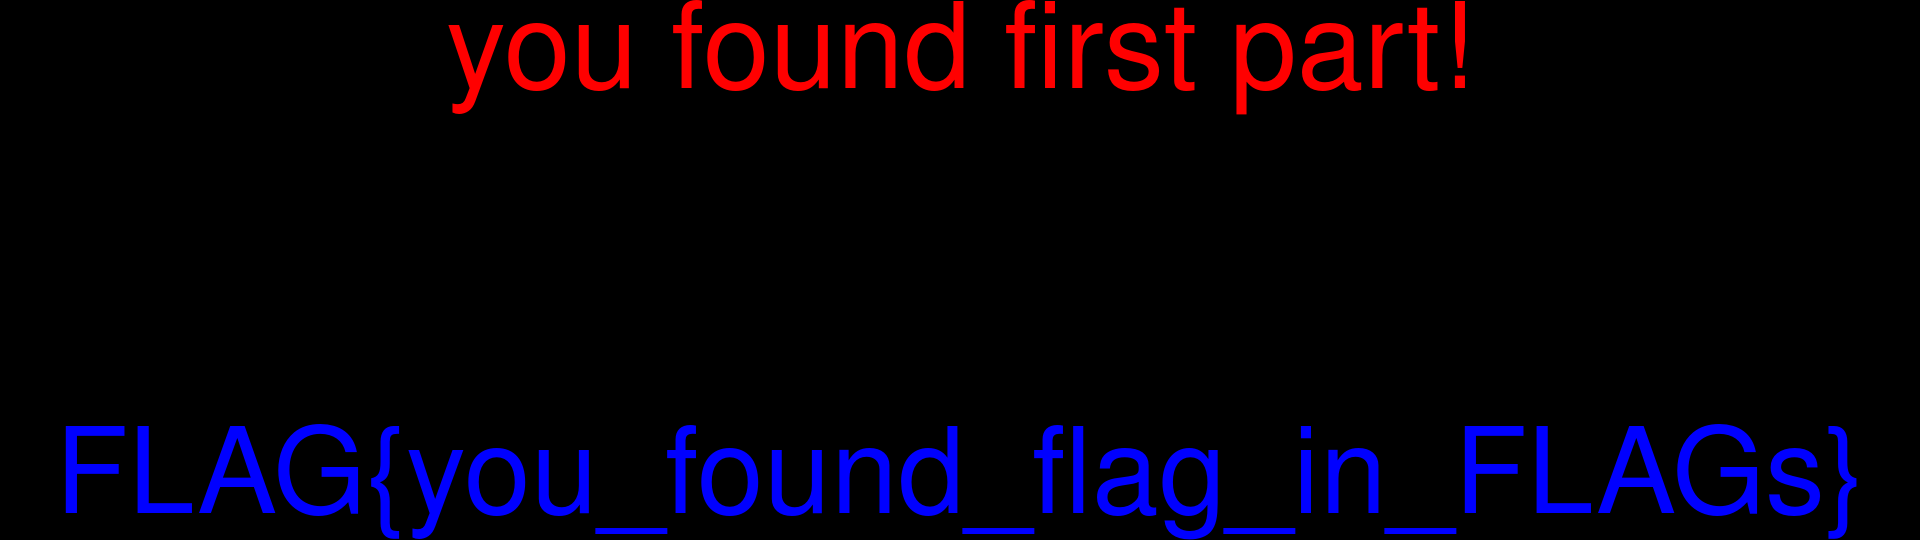

In [7]:
!icat /content/drive/MyDrive/wanictf_2021_fall/forensic/partition01/partition.img 13 -o 0002099200 > hoge.png
!icat /content/drive/MyDrive/wanictf_2021_fall/forensic/partition01/partition.img 13 -o 0003147776 >> hoge.png

from IPython.display import Image,display_png
display_png(Image('hoge.png'))


#misc

##binary

binary.csvのデータ部分をlistに取り出して

In [44]:
with open("/content/drive/MyDrive/wanictf_2021_fall/misc/binary/mis-binary/binary.csv", "r") as f:
  f.readline()
  bits = [x[-2] for x in f]


復号の処理はsample.pyをそのまま流用

In [45]:
s = ""
c = 0
for i in range(len(bits)):
    val = int(bits[i])
    c = (c << 1) | val
    if i % 8 == 7:
        s = s + chr(c)
        c = 0

print(s)


FLAG{binary-is-essential-for-communication}



##docker_dive

In [ ]:
!apt install file

In [3]:
!file /content/drive/MyDrive/wanictf_2021_fall/misc/docker_dive/mis-docker/solver

/content/drive/MyDrive/wanictf_2021_fall/misc/docker_dive/mis-docker/solver: ELF 64-bit LSB shared object, x86-64, version 1 (SYSV), dynamically linked, interpreter /lib64/ld-linux-x86-64.so.2, BuildID[sha1]=bcc91d289bc2ab32a131ab077081264f89f741b7, for GNU/Linux 3.2.0, stripped


In [4]:
!cat /content/drive/MyDrive/wanictf_2021_fall/misc/docker_dive/mis-docker/Dockerfile

FROM alpine:3.14
WORKDIR /home/misc
ADD ./solver /home/misc/solver
RUN chmod 550 /home/misc/solver
RUN apk add libc6-compat
RUN ls /home/misc -lh


以下、ローカルでdockerコマンドを入力

<pre>
$ docker build
"docker build" requires exactly 1 argument.
See 'docker build --help'.

Usage:  docker build [OPTIONS] PATH | URL | -

Build an image from a Dockerfile
(base) teruakinoMacBook-Air:mis-docker teruaki$ docker build .
[+] Building 10.5s (11/11) FINISHED
 => [internal] load build definition from Dockerfile                                            0.1s
 => => transferring dockerfile: 37B                                                             0.0s
 => [internal] load .dockerignore                                                               0.0s
 => => transferring context: 2B                                                                 0.0s
 => [internal] load metadata for docker.io/library/alpine:3.14                                  3.8s
 => [internal] load build context                                                               0.1s
 => => transferring context: 28B                                                                0.0s
 => [1/6] FROM docker.io/library/alpine:3.14@sha256:635f0aa53d99017b38d1a0aa5b2082f7812b03e3cd  2.5s
 => => resolve docker.io/library/alpine:3.14@sha256:635f0aa53d99017b38d1a0aa5b2082f7812b03e3cd  0.0s
 => => sha256:635f0aa53d99017b38d1a0aa5b2082f7812b03e3cdb299103fe77b5c8a07f1d2 1.64kB / 1.64kB  0.0s
 => => sha256:5e604d3358ab7b6b734402ce2e19ddd822a354dc14843f34d36c603521dbb4f9 528B / 528B      0.0s
 => => sha256:0a97eee8041e2b6c0e65abb2700b0705d0da5525ca69060b9e0bde8a3d17afdb 1.47kB / 1.47kB  0.0s
 => => sha256:97518928ae5f3d52d4164b314a7e73654eb686ecd8aafa0b79acd980773a740d 2.82MB / 2.82MB  1.7s
 => => extracting sha256:97518928ae5f3d52d4164b314a7e73654eb686ecd8aafa0b79acd980773a740d       0.6s
 => [2/6] WORKDIR /home/misc                                                                    0.1s
 => [3/6] ADD ./solver /home/misc/solver                                                        0.1s
 => [4/6] RUN chmod 550 /home/misc/solver                                                       0.6s
 => [5/6] RUN apk add libc6-compat                                                              1.8s
 => [6/6] RUN ls /home/misc -lh                                                                 0.5s
 => exporting to image                                                                          0.2s
 => => exporting layers                                                                         0.2s
 => => writing image sha256:59e659ba7adcfb6b58363a888b6cbab5290b1eb75421ab5b5febc942dde389cf    0.0s

Use 'docker scan' to run Snyk tests against images to find vulnerabilities and learn how to fix them
</pre>

<pre>
$ docker images
REPOSITORY              TAG       IMAGE ID       CREATED          SIZE
<none>                  <none>    59e659ba7adc   44 seconds ago   7.81MB

$ docker run -it 59e659ba7adc
/home/misc # ls
solver
/home/misc # ./solver
musl libc (x86_64)
Version 1.2.2
Dynamic Program Loader
Usage: /lib/ld-musl-x86_64.so.1 [options] [--] pathname
FLAG{y0u_Kn0W_H0w_to_Get_1nto_7he_DockeR}/home/misc #
</pre>

##digital ASK

In [47]:
with open('/content/drive/MyDrive/wanictf_2021_fall/misc/digital_ASK/mis-ask/digital_ask.csv', 'r') as f:
  f.readline()
  raw_bits = [x[-2] for x in f]

len(raw_bits)

95040

矩形波の単位（時間）を調べる

In [56]:
j = 0
y = ""
delta = []
for i, x in enumerate(raw_bits):
  if not x == y:
    delta.append(i-j)
    j = i
    y = x

delta[:15]

[0, 800, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]

単位時間16個分だろうと予想が付く

In [58]:
bits = [x for x in raw_bits[::16]]

bits[:15]

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']

preambleを探して・・・

In [59]:
"".join(bits).index("10"*16)

50

その後を復号する

復号処理はsample.pyをそのまま流用

In [60]:
bits = bits[50:]

s = ""
c = 0

for i in range(len(bits)):
    val = int(bits[i])
    c = (c << 1) | val
    if i % 8 == 7:
        s = s + chr(c)
        c = 0

print(s)

ªªªªåFLAG{please-understand-frame-format-of-wireless-communication}
      *ªªª¹QQÞÜX\ÙK][\Ý[Y[YKYÜX][Ù]Ú\[\ÜËXÛÛ[][XØ][ÛB     
ªªª®TdÄw·ÆV6R×VæFW'7FæBÖg&ÖRÖf÷&ÖBÖöb×v&VÆW72Ö6öÖ×Væ6FöçÐ      ªªª«1íÁ±ÍµÕ¹ÉÍÑ¹µÉµµ½ÉµÐµ½µÝ¥É±ÍÌµ½µµÕ¹¥Ñ¥½¹ô(      ªªªªåFLAG{please-understand-frame-format-of-wireless-communication}
      *ªªª¹QQÞÜX\ÙK][\Ý[Y[YKYÜX][Ù]Ú\[\ÜËXÛÛ[][XØ][ÛB     
ªªª®TdÄw·ÆV6R×VæFW'7FæBÖg&ÖRÖf÷&ÖBÖöb×v&VÆW72Ö6öÖ×Væ6FöçÐ      ªªª«1íÁ±ÍµÕ¹ÉÍÑ¹µÉµµ½ÉµÐµ½µÝ¥É±ÍÌµ½µµÕ¹¥Ñ¥½¹ô(      ªªªªåFLAG{please-understand-frame-format-of-wireless-communication}
      *ªªª¹QQÞÜX\ÙK][\Ý[Y[YKYÜX][Ù]Ú\[\ÜËXÛÛ[][XØ][ÛB


##ASK_over_the_air

とにかく、試行錯誤

最初の立ち上がりがpreambleだろうと予想して、単位波がどのくらいになるのかを推定

In [ ]:
with open("/content/drive/MyDrive/wanictf_2021_fall/misc/ASK_over_the_air/mis-ask-over-the-air/ask-over-the-air.csv", "r") as f:
  f.readline()
  raw_data = [(float(x.split(",")[1]), float(x.split(",")[2])) for x in f]

raw_data[746:]


当日はI信号とQ信号の意味がよく分からなかったので、とりあえず足すことにした・・・

が、本来は二乗和のルートを計算するのが正解らいし

In [ ]:
[x[0] + x[1] for x in raw_data]

閾値の検索

なんとなく分かるんだけど、結構迷う、なんせ試行錯誤

１シンボルを幾つにするかはpreambleから推定可能


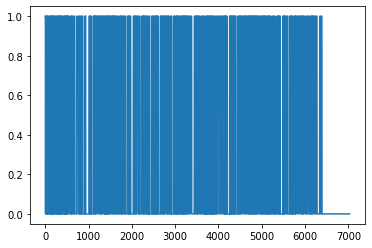

In [118]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
y = [1 if abs(x[0] + x[1]) > 0.001 else 0 for x in raw_data][736:]
x = [x for x in range(len(y))]
plt.plot(x, y)

ノイズがあるらしいので過半数が「１」なら「１」、そうでないなら「０」ということに・・・

In [119]:
bits = [1 if sum(y[i:i+16]) > 8 else 0 for i in range(0, len(y), 16)]

とりあえず頭の方を復号してみて「FLAG」という文字列がでるまでいろんな値を試行錯誤した結果・・・

In [120]:
s = ""
c = 0

for i in range(len(bits)):
    val = int(bits[i])
    c = (c << 1) | val
    if i % 8 == 7:
        s = s + chr(c)
        c = 0

print(s)

ªªªªåFLAG{you-can-decode-many-IoT-communications}
     


公式Write Upを参考に再構成してみた


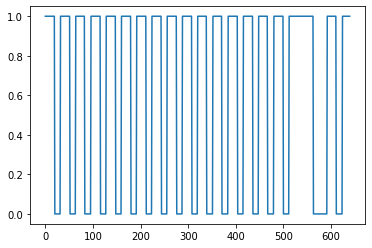

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
y = [1 if math.sqrt(x[0]**2 + x[1]**2) > 2.50e-03 else 0 for x in raw_data][736:736+16*40]
x = [x for x in range(len(y))]
plt.plot(x, y)

#reversing

##ltrace

In [ ]:
!apt install ltrace

In [125]:
!chmod +x /content/drive/MyDrive/wanictf_2021_fall/reversing/ltrace/rev-ltrace/ltrace

In [126]:
!ltrace -s 255 /content/drive/MyDrive/wanictf_2021_fall/reversing/ltrace/rev-ltrace/ltrace

printf("Input flag : ")                          = 13
__isoc99_scanf(0x5591f8988012, 0x7ffd14fc3820, 0x7ffd14fc31d0, 0Input flag : aa
) = 1
strcmp("aa", "FLAG{c4n_y0u_7r4c3_dyn4m1c_l1br4ry_c4ll5?}") = 27
puts("Incorrect"Incorrect
)                                = 10
+++ exited (status 1) +++


##pwsh

In [ ]:
!apt-get update

In [ ]:
!apt-get install -y wget apt-transport-https software-properties-common

In [130]:
!wget -q https://packages.microsoft.com/config/ubuntu/20.04/packages-microsoft-prod.deb

In [ ]:
!dpkg -i packages-microsoft-prod.deb

In [ ]:
!apt-get update

In [ ]:
!apt-get install -y powershell

In [ ]:
!pwsh

エラーが出て実行できなかった・・・

仕方ないので、以下、ローカル環境

<pre>
# pwsh
PowerShell 7.2.0
Copyright (c) Microsoft Corporation.

https://aka.ms/powershell
Type 'help' to get help.

PS /ws/reversing/pwsh/rev-pwsh>
</pre>


In [138]:
!cat /content/drive/MyDrive/wanictf_2021_fall/reversing/pwsh/rev-pwsh/pwsh.ps1

(("{39}{4}{12}{45}{21}{0}{36}{25}{26}{27}{7}{13}{30}{16}{31}{48}{23}{18}{19}{20}{24}{28}{3}{38}{11}{5}{2}{8}{46}{34}{29}{1}{35}{15}{10}{33}{9}{32}{22}{37}{40}{6}{43}{17}{47}{44}{14}{41}{42}"-f ' world of PowerShe','d_p','cl','d3','ch','1n_','else','ost cW4Passwo','34r1n68r30b','{
  Writ','l}','_','o ','r','W4Incor','w3r5h3l','W','
 ','t ','-eq c','W4FLAG{','he','t c','(fj7inpu','y0u_','fj7input =',' ','Read-H','5ucc33','473','dc','4','e-Outpu','cW4) ','u5c','0','ll!cW4

','W4Co','d','e','rrect!cW4
} ','rec','tcW4
}
',' {','tput c','cW4Welcome to t','f',' Write-Ou','

if ')).replACe('cW4',[STRiNg][CHAr]34).replACe('8r3',[STRiNg][CHAr]95).replACe('fj7',[STRiNg][CHAr]36) |& ( $VErboSEPReFErencE.TostRIng()[1,3]+'x'-Join'')


googleさんに聞いたところ

>"|&"　の前が実行文字列<br>
>"|&"　の後が実行処理

らしい・・・※（参考） https://binary-pulsar.hatenablog.jp/entry/2018/09/19/000000



<pre>
PS /ws/reversing/pwsh/rev-pwsh> (("{39}{4}{12}{45}{21}{0}{36}{25}{26}{27}{7}{13}{30}{16}{31}{48}{23}{18}{19}{20}{24}{28}{3}{38}{11}{5}{2}{8}{46}{34}{29}{1}{35}{15}{10}{33}{9}{32}{22}{37}{40}{6}{43}{17}{47}{44}{14}{41}{42}"-f ' world of PowerShe','d_p','cl','d3','ch','1n_','else','ost cW4Passwo','34r1n68r30b','{
>>   Writ','l}','_','o ','r','W4Incor','w3r5h3l','W','
>>  ','t ','-eq c','W4FLAG{','he','t c','(fj7inpu','y0u_','fj7input =',' ','Read-H','5ucc33','473','dc','4','e-Outpu','cW4) ','u5c','0','ll!cW4
>>
>> ','W4Co','d','e','rrect!cW4
>> } ','rec','tcW4
>> }
>> ',' {','tput c','cW4Welcome to t','f',' Write-Ou','
>>
>> if ')).replACe('cW4',[STRiNg][CHAr]34).replACe('8r3',[STRiNg][CHAr]95).replACe('fj7',[STRiNg][CHAr]36)
echo "Welcome to the world of PowerShell!"

$input = Read-Host "Password"

if ($input -eq "FLAG{y0u_5ucc33d3d_1n_cl34r1n6_0bfu5c473d_p0w3r5h3ll}") {
  Write-Output "Correct!"
} else {
  Write-Output "Incorrect"
}

</pre>

#pwn

##nc

In [139]:
!nc nc.pwn.wanictf.org 9001

welcome to WaniCTF 2021!!!
ls
chall
flag.txt
redir.sh
cat flag.txt
FLAG{the-1st-step-to-pwn-is-netcatting}



##BOF

In [141]:
!nc bof.pwn.wanictf.org 9002

ふっかつのじゅもんを　いれてください
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
よくぞもどられた！
FLAG{D0_y0U_kN0w_BuFf3r_0Ver_fL0w?_ThA2k_y0U_fOR_s01v1ng!!}
Segmentation fault (core dumped)


#web

##post

In [1]:
!curl -XPOST -d 'data=hoge' https://post.web.wanictf.org/chal/1

<!DOCTYPE html>
<html>
  <head>
    <!-- Required meta tags -->
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">

    <!-- Bootstrap CSS -->
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@4.5.3/dist/css/bootstrap.min.css"
      integrity="sha384-TX8t27EcRE3e/ihU7zmQxVncDAy5uIKz4rEkgIXeMed4M0jlfIDPvg6uqKI2xXr2" crossorigin="anonymous">
  </head>

  <body>
    <nav class="navbar navbar-expand-sm navbar-light bg-light">
      <a class="navbar-brand" href="/">POST Challenge</a>
    </nav>
    <div class="container">
      
      
  Congratulations! Challenge 1 FLAG: y0u

<!-- debug: {"requestHeader":{"host":"post.web.wanictf.org","user-agent":"curl/7.58.0","content-length":"9","accept":"*/*","content-type":"application/x-www-form-urlencoded","x-forwarded-for":"34.80.71.213","x-forwarded-proto":"https","x-real-ip":"34.80.71.213","accept-encoding":"gzip"},"requestBody":{"data":"hoge"}} -->
    </div

In [2]:
!curl -XPOST -A "Mozilla/5.0" -d 'data=hoge' https://post.web.wanictf.org/chal/2

<!DOCTYPE html>
<html>
  <head>
    <!-- Required meta tags -->
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">

    <!-- Bootstrap CSS -->
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@4.5.3/dist/css/bootstrap.min.css"
      integrity="sha384-TX8t27EcRE3e/ihU7zmQxVncDAy5uIKz4rEkgIXeMed4M0jlfIDPvg6uqKI2xXr2" crossorigin="anonymous">
  </head>

  <body>
    <nav class="navbar navbar-expand-sm navbar-light bg-light">
      <a class="navbar-brand" href="/">POST Challenge</a>
    </nav>
    <div class="container">
      
      
  Congratulations! Challenge 2 FLAG: ar3

<!-- debug: {"requestHeader":{"host":"post.web.wanictf.org","user-agent":"Mozilla/5.0","content-length":"9","accept":"*/*","content-type":"application/x-www-form-urlencoded","x-forwarded-for":"34.80.71.213","x-forwarded-proto":"https","x-real-ip":"34.80.71.213","accept-encoding":"gzip"},"requestBody":{"data":"hoge"}} -->
    </div

In [3]:
!curl -d 'data[hoge]=fuga' https://post.web.wanictf.org/chal/3

<!DOCTYPE html>
<html>
  <head>
    <!-- Required meta tags -->
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">

    <!-- Bootstrap CSS -->
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@4.5.3/dist/css/bootstrap.min.css"
      integrity="sha384-TX8t27EcRE3e/ihU7zmQxVncDAy5uIKz4rEkgIXeMed4M0jlfIDPvg6uqKI2xXr2" crossorigin="anonymous">
  </head>

  <body>
    <nav class="navbar navbar-expand-sm navbar-light bg-light">
      <a class="navbar-brand" href="/">POST Challenge</a>
    </nav>
    <div class="container">
      
      
  Congratulations! Challenge 3 FLAG: http

<!-- debug: {"requestHeader":{"host":"post.web.wanictf.org","user-agent":"curl/7.58.0","content-length":"15","accept":"*/*","content-type":"application/x-www-form-urlencoded","x-forwarded-for":"34.80.71.213","x-forwarded-proto":"https","x-real-ip":"34.80.71.213","accept-encoding":"gzip"},"requestBody":{"data":{"hoge":"fuga"}}} --

In [4]:
!curl -X POST -i -H "Content-Type: application/json" -d '{"hoge":1,"fuga":null}' https://post.web.wanictf.org/chal/4

HTTP/2 200 
content-type: text/html; charset=utf-8
date: Sun, 07 Nov 2021 10:37:40 GMT
etag: W/"59e-oss1u7mVm+w80vSr7KcaKjZ6xJQ"
x-powered-by: Express
content-length: 1438

<!DOCTYPE html>
<html>
  <head>
    <!-- Required meta tags -->
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">

    <!-- Bootstrap CSS -->
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@4.5.3/dist/css/bootstrap.min.css"
      integrity="sha384-TX8t27EcRE3e/ihU7zmQxVncDAy5uIKz4rEkgIXeMed4M0jlfIDPvg6uqKI2xXr2" crossorigin="anonymous">
  </head>

  <body>
    <nav class="navbar navbar-expand-sm navbar-light bg-light">
      <a class="navbar-brand" href="/">POST Challenge</a>
    </nav>
    <div class="container">
      
      
  Congratulations! Challenge 4 FLAG: p0st

<!-- debug: {"requestHeader":{"host":"post.web.wanictf.org","user-agent":"curl/7.58.0","content-length":"22","accept":"*/*","content-type":"application/json",

In [2]:
!curl -X POST -F data=@/content/drive/MyDrive/wanictf_2021_fall/web/POST_Challenge/web-http-post/app/public/images/wani.png https://post.web.wanictf.org/chal/5

<!DOCTYPE html>
<html>
  <head>
    <!-- Required meta tags -->
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">

    <!-- Bootstrap CSS -->
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@4.5.3/dist/css/bootstrap.min.css"
      integrity="sha384-TX8t27EcRE3e/ihU7zmQxVncDAy5uIKz4rEkgIXeMed4M0jlfIDPvg6uqKI2xXr2" crossorigin="anonymous">
  </head>

  <body>
    <nav class="navbar navbar-expand-sm navbar-light bg-light">
      <a class="navbar-brand" href="/">POST Challenge</a>
    </nav>
    <div class="container">
      
      
  Congratulations! Challenge 5 FLAG: m@ster!

<!-- debug: {"requestHeader":{"host":"post.web.wanictf.org","user-agent":"curl/7.58.0","content-length":"135385","accept":"*/*","content-type":"multipart/form-data; boundary=------------------------c92eef57b8eae81b","x-forwarded-for":"35.237.44.20","x-forwarded-proto":"https","x-real-ip":"35.237.44.20","accept-encoding":"gzip"